In [ ]:
import numpy as np
import pandas as pd

In [ ]:
iris = pd.read_csv('/content/drive/MyDrive/Deep_learning-datasets/iris.csv')

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
X = iris.drop('species',axis=1)

In [ ]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [ ]:
y = iris['species']

In [ ]:
y

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [ ]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelBinarizer

In [ ]:
encoder = LabelBinarizer()

In [ ]:
y = encoder.fit_transform(y)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(4,activation='relu',input_shape=[4,]))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(patience=10)

In [ ]:
model.fit(scaled_X_train,y_train,epochs=1000,callbacks=[early_stop],validation_data=(scaled_X_test,y_test))

Epoch 1/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.3287 - loss: 1.4217 - val_accuracy: 0.4000 - val_loss: 1.3227
Epoch 2/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.3027 - loss: 1.4264 - val_accuracy: 0.4000 - val_loss: 1.3126
Epoch 3/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.2652 - loss: 1.4435 - val_accuracy: 0.4000 - val_loss: 1.3019
Epoch 4/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3131 - loss: 1.3794 - val_accuracy: 0.4000 - val_loss: 1.2914
Epoch 5/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3069 - loss: 1.3533 - val_accuracy: 0.4000 - val_loss: 1.2810
Epoch 6/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3110 - loss: 1.3509 - val_accuracy: 0.4000 - val_loss: 1.2704
Epoch 7/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3329 - loss: 1.3052 - val_accuracy: 0.4000 - val_loss: 1.2605
Epoch 8/1000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.3350 - loss: 1.2957 - val_accuracy: 0.4000 - v

In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
metrics

,accuracy,loss,val_accuracy,val_loss
0,0.316667,1.421765,0.400000,1.322711
1,0.316667,1.405886,0.400000,1.312641
2,0.316667,1.391520,0.400000,1.301896
3,0.316667,1.374511,0.400000,1.291431
4,0.316667,1.358613,0.400000,1.280988
...,...,...,...,...
995,0.966667,0.119431,0.933333,0.152671
996,0.966667,0.119285,0.933333,0.152529
997,0.966667,0.119222,0.933333,0.152318
998,0.966667,0.119024,0.933333,0.152754


<Axes: >

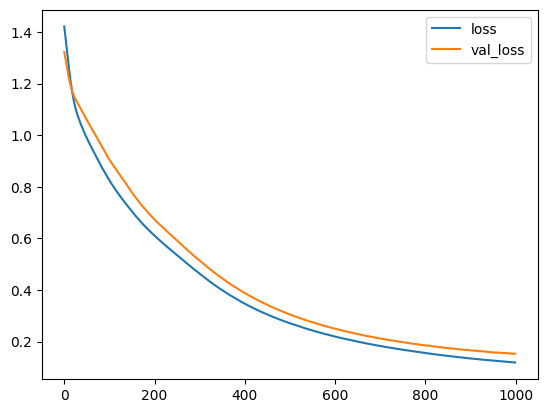

In [ ]:
metrics[['loss','val_loss']].plot()

<Axes: >

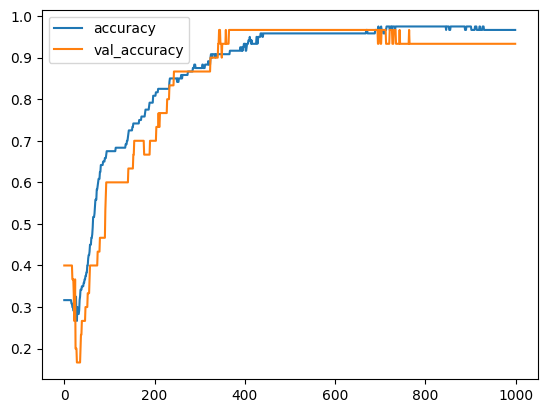

In [ ]:
metrics[['accuracy','val_accuracy']].plot()

In [ ]:
model.evaluate(scaled_X_test,y_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.9333 - loss: 0.1529


[0.15289078652858734, 0.9333333373069763]

In [ ]:
scaled_X = scaler.fit_transform(X)

In [ ]:
model = Sequential()
model.add(Dense(4,activation='relu',input_shape=[4,]))
model.add(Dense(3,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.fit(scaled_X,y,epochs=800)

Epoch 1/800
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5526 - loss: 1.0663
Epoch 2/800
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6665 - loss: 1.0627 
Epoch 3/800
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6774 - loss: 1.0655 
Epoch 4/800
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6418 - loss: 1.0587 
Epoch 5/800
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6318 - loss: 1.0590 
Epoch 6/800
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6396 - loss: 1.0584 
Epoch 7/800
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6301 - loss: 1.0552 
Epoch 8/800
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6739 - loss: 1.0474 
Epoch 9/800
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6748 - loss: 1.0433 
Epoch 10/800
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6113 - loss: 1.0435 
Epoch 11/800
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6352 - loss: 1.0435 
Epoch 12/800
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6417 - loss

In [ ]:
model.save('/content/drive/MyDrive/Deep_learning-datasets/final_iris_model.keras')

In [ ]:
import joblib

In [ ]:
joblib.dump(scaler,'/content/drive/MyDrive/Deep_learning-datasets/iris_scaler.pkl')

['/content/drive/MyDrive/Deep_learning-datasets/iris_scaler.pkl']

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
flower_model = load_model('/content/drive/MyDrive/Deep_learning-datasets/final_iris_model.keras')

In [ ]:
flower_scaler = joblib.load('/content/drive/MyDrive/Deep_learning-datasets/iris_scaler.pkl')

In [ ]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [ ]:
flower_example = {
    "sepal_length" : 5.1,
    "sepal_width" : 3.5,
    "petal_length" : 1.4,
    "petal_width" : 0.2
}

In [ ]:
def return_prediction(model,scaler,sample_json):
  s_len = sample_json["sepal_length"]
  s_wid = sample_json["sepal_width"]
  p_len = sample_json["petal_length"]
  p_wid = sample_json["petal_width"]
  flower = [[s_len,s_wid,p_len,p_wid]]
  classes = np.array(['setosa','versicolor','virginica'])
  flower = scaler.transform(flower)
  class_ind = int(np.round(np.argmax(model.predict(flower)[0])))
  return classes[class_ind]

In [ ]:
return_prediction(flower_model,flower_scaler,flower_example)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


'setosa'

In [ ]:
from tensorflow.keras.models import load_model
import joblib
import numpy as np

flower_model = load_model('/content/drive/MyDrive/Deep_learning-datasets/final_iris_model.keras')
flower_scaler = joblib.load('/content/drive/MyDrive/Deep_learning-datasets/iris_scaler.pkl')

def return_prediction(model,scaler,sample_json):
  s_len = sample_json["sepal_length"]
  s_wid = sample_json["sepal_width"]
  p_len = sample_json["petal_length"]
  p_wid = sample_json["petal_width"]
  flower = [[s_len,s_wid,p_len,p_wid]]
  classes = np.array(['setosa','versicolor','virginica'])
  flower = scaler.transform(flower)
  class_ind = int(np.round(np.argmax(model.predict(flower)[0])))
  return classes[class_ind]